In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from lime import lime_image
from skimage.segmentation import slic
from skimage.color import gray2rgb, rgb2gray

In [2]:
def preprocess_input(x):
    return x / 255.0

In [3]:
model = tf.keras.models.load_model('models/6')

In [4]:
explainer = lime_image.LimeImageExplainer()

In [5]:
image_paths = ['tumor/glioma_tumor/gt-0.jpg', 'tumor/meningioma_tumor/mt-0.jpg', 'tumor/no_tumor/nt-0.jpg','tumor/pituitary_tumor/pt-0.jpg']
image_names = ['glioma tumor', 'meningioma tumor', 'no tumor','pituitary tumor']
images = [tf.keras.preprocessing.image.load_img(path, target_size=(512, 512)) for path in image_paths]
image_arrays = [tf.keras.preprocessing.image.img_to_array(image) for image in images]

In [6]:
exp_array=[]
for image_array in image_arrays :
    image_array=preprocess_input(image_array)
    exp = explainer.explain_instance(image_array, 
                                 model.predict, 
                                 top_labels=5, 
                                 hide_color=0, 
                                 num_samples=1000)
    exp_array.append(exp)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 564ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 705ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 600ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 639ms/step


In [ ]:
print(exp_array)

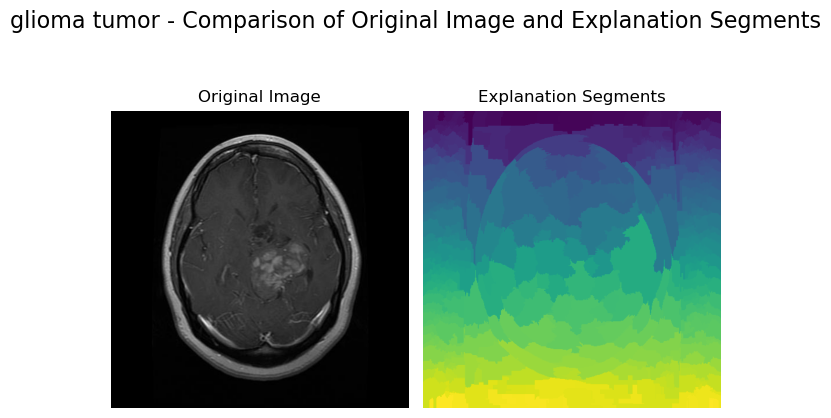

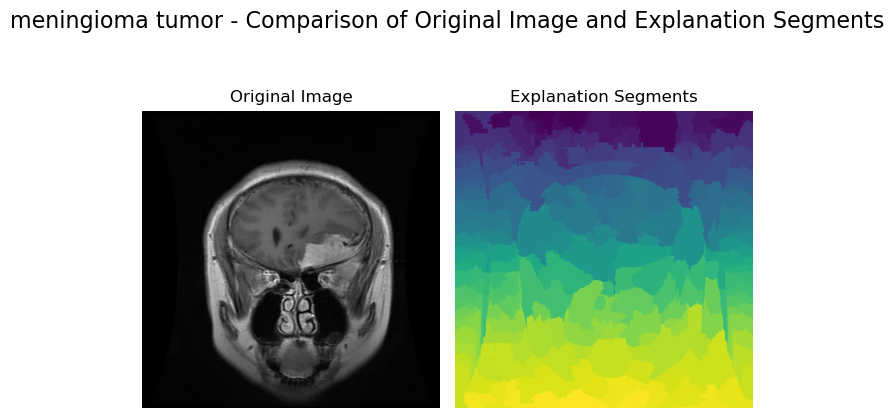

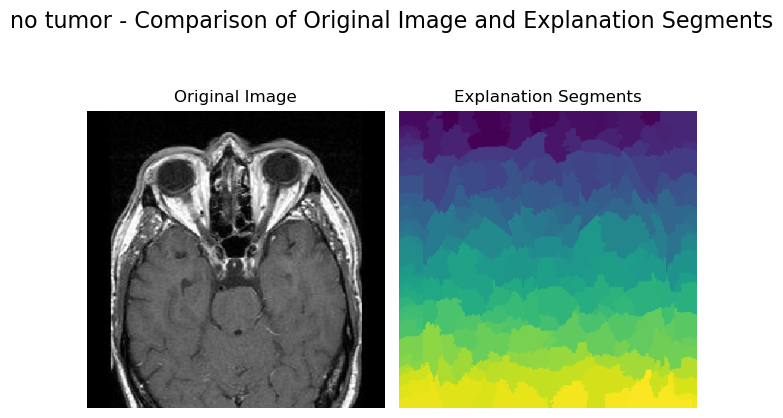

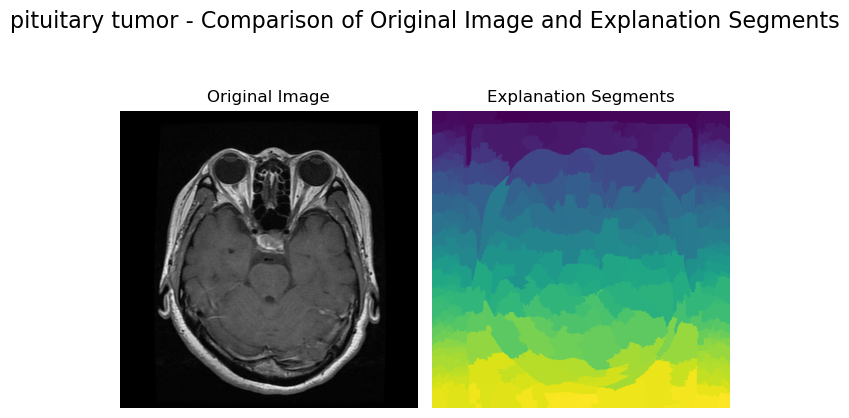

In [46]:
from skimage.io import imread
for index, ex in enumerate(exp_array):
    original_image = imread(image_paths[index])
    
    

    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.axis('off')
    plt.title('Original Image')
    
    plt.subplot(1, 2, 2)
    plt.imshow(ex.segments)
    plt.axis('off')
    plt.title('Explanation Segments')
    
    common_title = 'Comparison of Original Image and Explanation Segments'
    plt.suptitle(f"{image_names[index]} - {common_title}", fontsize=16, x=0.5)

    plt.tight_layout()
    
    plt.show()

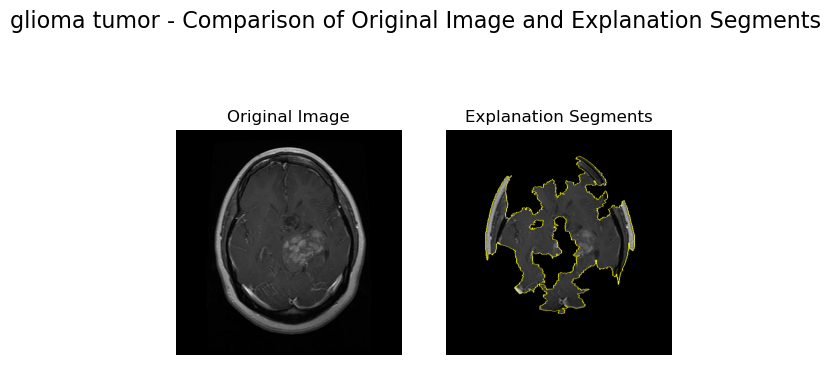

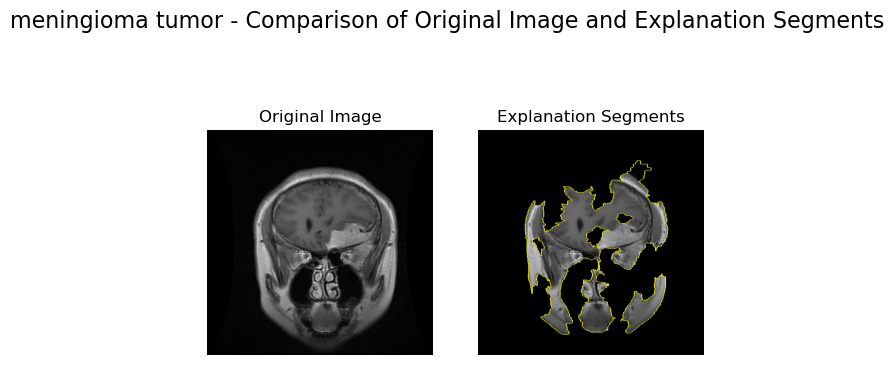

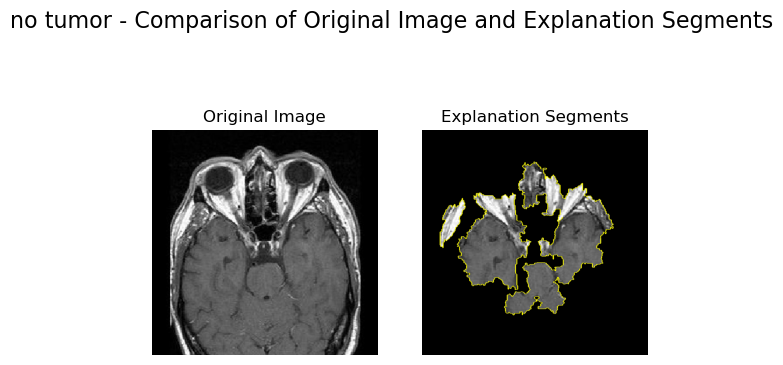

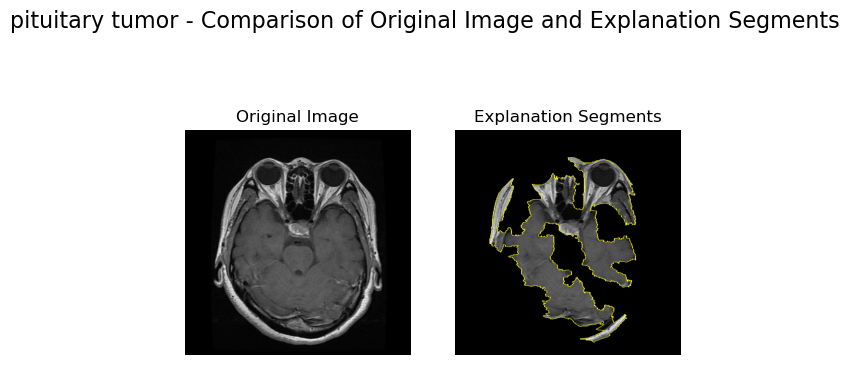

In [47]:
from skimage.segmentation import mark_boundaries

for index, ex in enumerate(exp_array):
    
    original_image = imread(image_paths[index])
    image, mask = ex.get_image_and_mask(ex.top_labels[0], 
                                        positive_only=True, 
                                        num_features=100,  
                                        hide_rest=True,
                                        min_weight=0.001
                                    )
    
    
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.axis('off')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(mark_boundaries(image, mask))
    plt.axis('off')
    plt.title('Explanation Segments')
    
    common_title = 'Comparison of Original Image and Explanation Segments'
    plt.suptitle(f"{image_names[index]} - {common_title}", fontsize=16, x=0.5)

    plt.show()

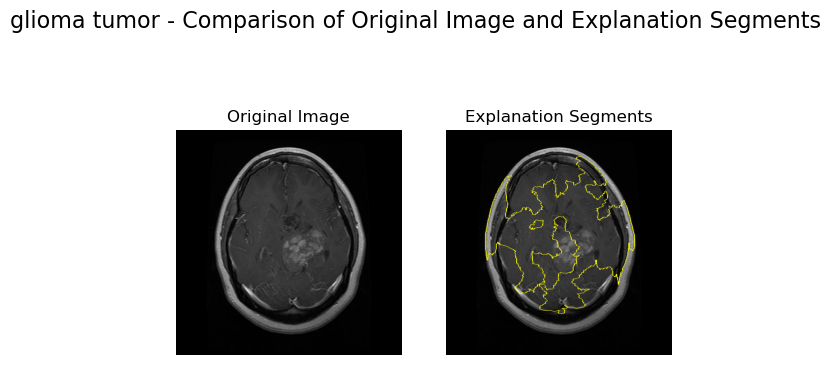

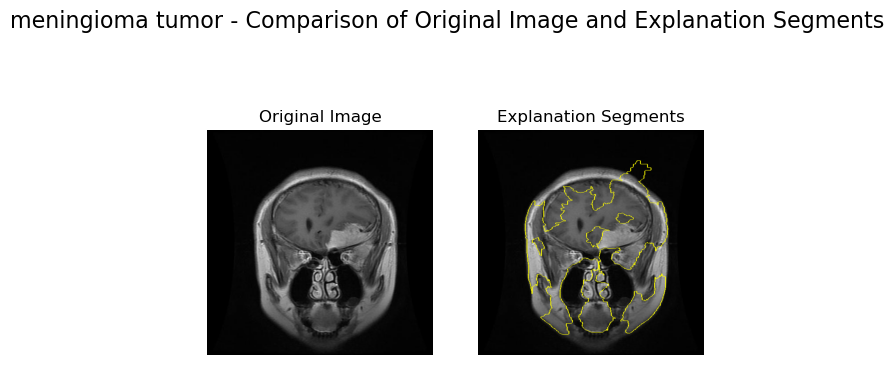

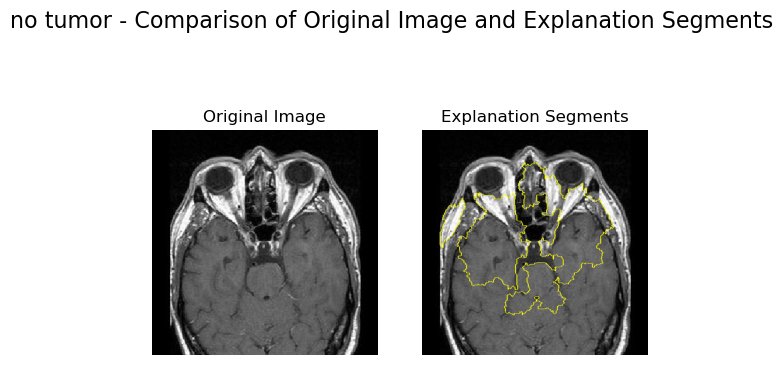

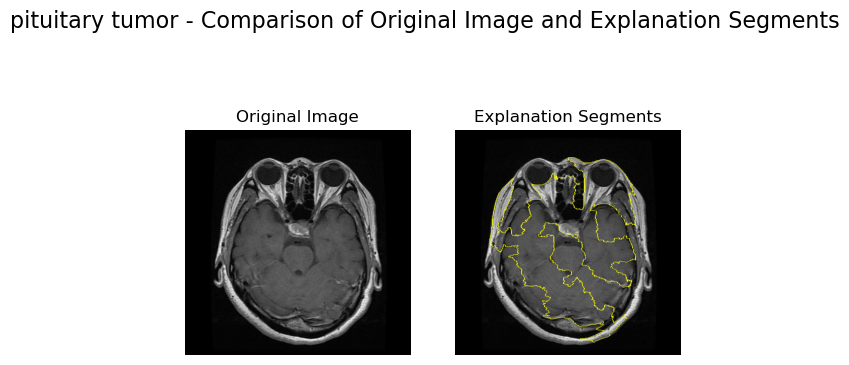

In [48]:
for index, ex in enumerate(exp_array):
    
    original_image = imread(image_paths[index])
    image, mask = ex.get_image_and_mask(ex.top_labels[0], 
                                        positive_only=True, 
                                        num_features=100,  
                                        hide_rest=False,
                                        min_weight=0.001
                                       )
    

    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.axis('off')
    plt.title('Original Image')
    
    plt.subplot(1, 2, 2)
    plt.imshow(mark_boundaries(image, mask))
    plt.axis('off')
    plt.title('Explanation Segments')
    
    common_title = 'Comparison of Original Image and Explanation Segments'
    plt.suptitle(f"{image_names[index]} - {common_title}", fontsize=16, x=0.5)
    
    plt.show()

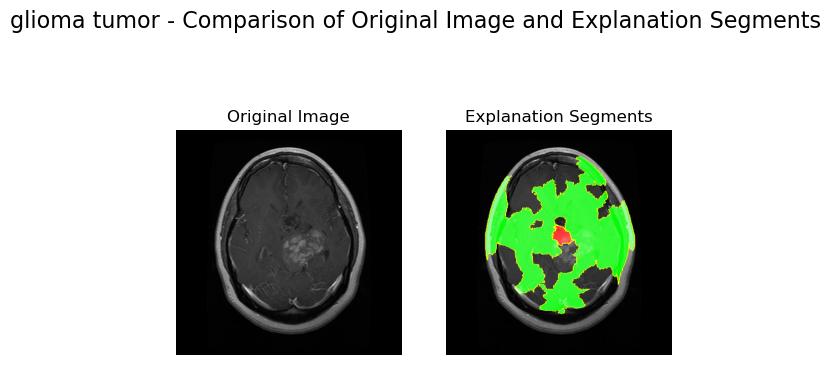

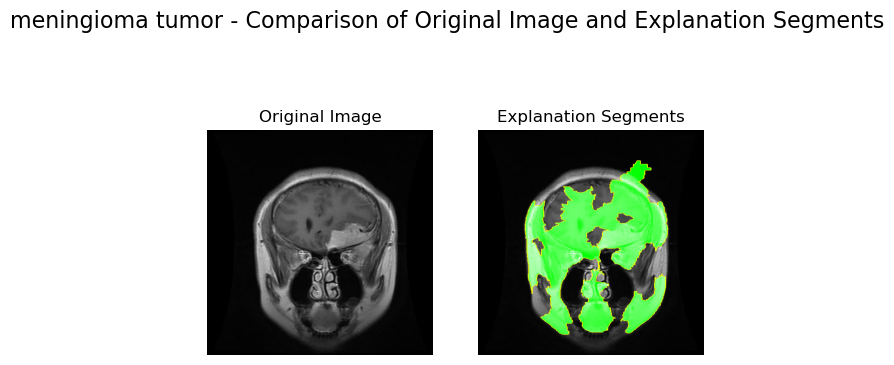

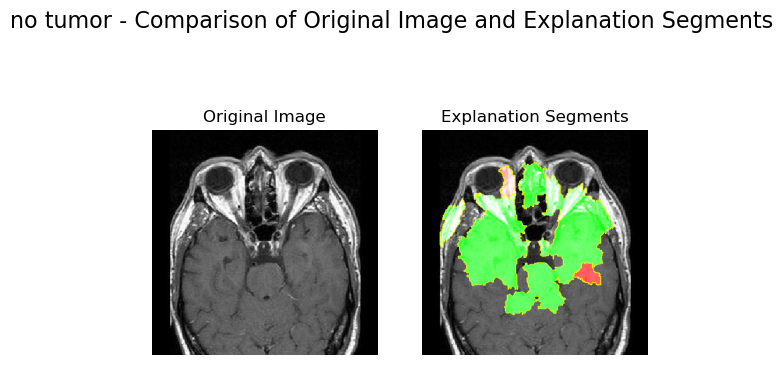

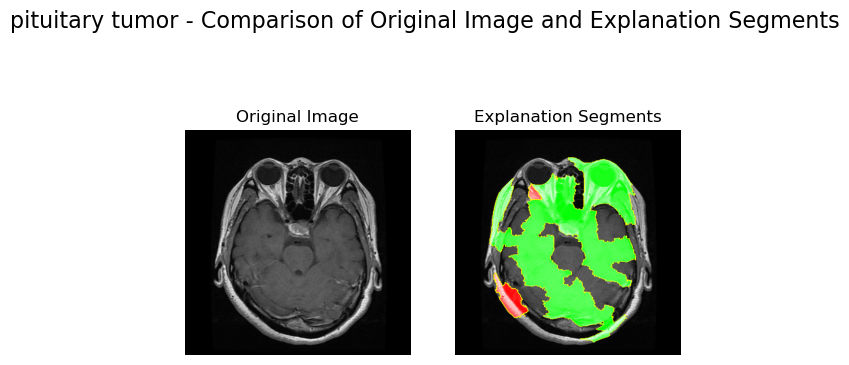

In [49]:
for index, ex in enumerate(exp_array):
    
    original_image = imread(image_paths[index])
    
    image, mask = ex.get_image_and_mask(ex.top_labels[0], 
                                        positive_only=False, 
                                        num_features=100,  
                                        hide_rest=False,
                                        min_weight=0.001
                                       )
    

    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.axis('off')
    plt.title('Original Image')
    
    plt.subplot(1, 2, 2)
    plt.imshow(mark_boundaries(image, mask))
    plt.axis('off')
    plt.title('Explanation Segments')
    
    common_title = 'Comparison of Original Image and Explanation Segments'
    plt.suptitle(f"{image_names[index]} - {common_title}", fontsize=16, x=0.5)
    
    plt.show()

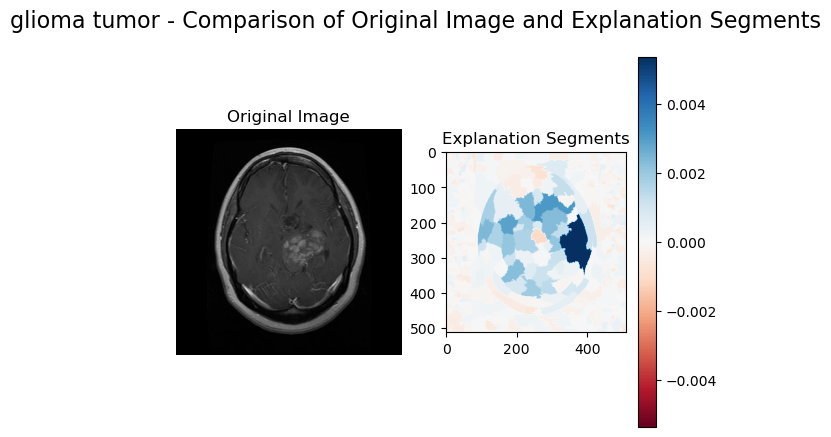

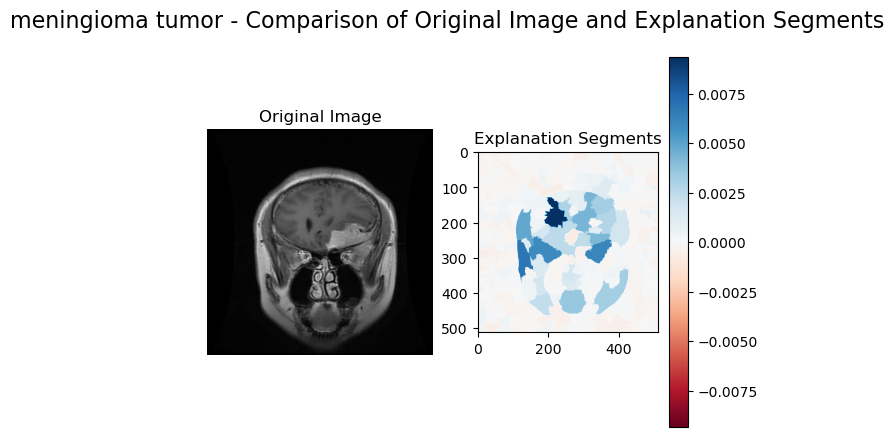

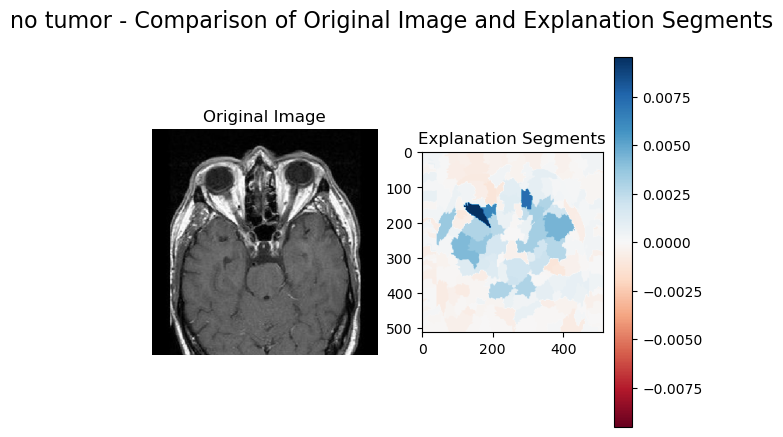

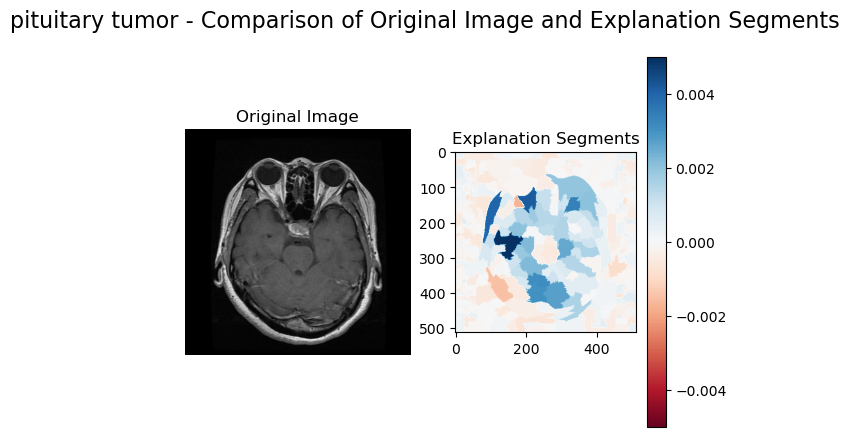

In [50]:
for index, ex in enumerate(exp_array):

    original_image = imread(image_paths[index])
    

    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.axis('off')
    plt.title('Original Image')
    
    plt.subplot(1, 2, 2)
    dict_heatmap = dict(ex.local_exp[ex.top_labels[0]])
    heatmap = np.vectorize(dict_heatmap.get)(ex.segments) 
    plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
    plt.colorbar()
    
    plt.title('Explanation Segments')
    
    common_title = 'Comparison of Original Image and Explanation Segments'
    plt.suptitle(f"{image_names[index]} - {common_title}", fontsize=16, x=0.5)
    
    plt.show()